# Project: Investigate a Dataset (Database_TMDb_movie_data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

## What do we want to infer from the data?
Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?

In [78]:
#importing all packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
in data wrangling we will load data file and we will know about thier properties. 
### General Properties

In [79]:
# Load data amd showing data fram 
df= pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [80]:
# showing tuple of the dimensions of the dataframe
df.shape

(10866, 21)

The data contains (10866 rows) and (21 columns)


In [81]:
#showing info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are many missing data 
and we know data types for data

In [82]:
#showing missing values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

imdb_id , cast, homepage,director ,tagline ,keywords , overview ,genres and production_companies have missing values

In [83]:
#showing is there duplicates 
df.duplicated().sum()

1

There is one duplicated data

In [84]:
#showing the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [85]:
#showing description of dataset 
df.describe().round(2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,1.086600e+04,1.086600e+04,10866.00,10866.00,10866.00,10866.00,1.086600e+04,1.086600e+04
mean,66064.18,0.65,1.462570e+07,3.982332e+07,102.07,217.39,5.97,2001.32,1.755104e+07,5.136436e+07
std,92130.14,1.00,3.091321e+07,1.170035e+08,31.38,575.62,0.94,12.81,3.430616e+07,1.446325e+08
min,5.00,0.00,0.000000e+00,0.000000e+00,0.00,10.00,1.50,1960.00,0.000000e+00,0.000000e+00
25%,10596.25,0.21,0.000000e+00,0.000000e+00,90.00,17.00,5.40,1995.00,0.000000e+00,0.000000e+00
50%,20669.00,0.38,0.000000e+00,0.000000e+00,99.00,38.00,6.00,2006.00,0.000000e+00,0.000000e+00
75%,75610.00,0.71,1.500000e+07,2.400000e+07,111.00,145.75,6.60,2011.00,2.085325e+07,3.369710e+07
max,417859.00,32.99,4.250000e+08,2.781506e+09,900.00,9767.00,9.20,2015.00,4.250000e+08,2.827124e+09


●Min value of budget, revenue, runtime, budget_adj and revenue_adj = 0

●Mean value of budget 1.462570e+07 and max 4.250000e+08	

●Mean value of revenue 3.982332e+07 and  max 2.781506e+09




### Data Cleaning 

In [86]:
#remove duplicated values
df.drop_duplicates(inplace=True)

In [87]:
#make sure we dont have duplicated values
df.duplicated().sum()

0

As shown we dont have any duplicated values

In [88]:
# remove columns that we dont need
df.drop(["imdb_id","cast","tagline","keywords","director","homepage","overview","production_companies"], axis=1, inplace=True)
df.head(0)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


Removing the columns that we dont need at our analysis

In [89]:
# convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [90]:
# make sure we cinvert release_date
df.dtypes
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

As shown release_date converted to datetime

In [91]:
# get budget mean
budget_mean = round(df['budget'].mean())
print(budget_mean)

14624286.0


In [92]:
# replaced budget zero values with mean value
df['budget'] = df.budget.mask(df.budget == 0,budget_mean)
df.loc[df['budget'] == 0]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


we replaced budget zero values with mean value As shown 

In [93]:
# revenue mean
revenue_mean = round(df['revenue'].mean())
print(revenue_mean)

39826896.0


In [94]:
# replaced revenue zero values with mean value
df['revenue'] = df.revenue.mask(df.revenue == 0,revenue_mean)
df.loc[df['revenue'] == 0]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


we replaced revenue zero values with mean value As shown 

In [95]:
#get runtime mean
runtime_mean = round(df['runtime'].mean())
print(runtime_mean)


102.0


In [96]:
# replaced runtime zero values with mean value
df['runtime'] = df.runtime.mask(df.runtime == 0,runtime_mean)
df.loc[df['runtime'] == 0]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


we replaced runtime zero values with mean value As shown 

In [97]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.362816,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,30.904045,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As shown all zero values replaced with mean values

<a id='eda'></a>
## Exploratory Data Analysis
 Now going to explore data computing statistics and visualizing data 
### General look

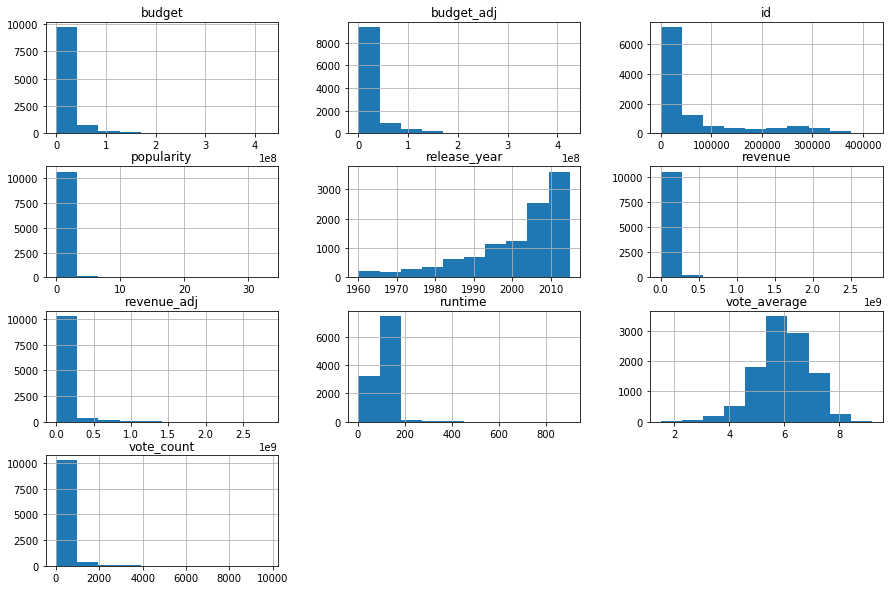

In [98]:
df.hist(figsize=(15,10));

### Answer The first Q (Which genres are most popular from year to year?)

In [99]:
# combine cells of genre column
def extract_data(genres):
    data = df[genres].str.cat(sep = '|')
    data= pd.Series(data.split('|')) 
    count= data.value_counts()   
    return count   

In [100]:
#extract geners 
genres = extract_data('genres')
genres.head(20)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

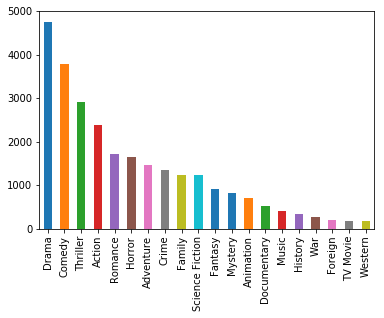

In [101]:
genres.plot.bar()

The figuer tell us the most popular genres is Drama ( 4760 ) then the second is Comedy (3793 ) then Thriller (2907 )

### Answer The second Q (What kinds of properties are associated with movies that have high revenues?)


In [102]:
#lets see count of movies over realese_year 
movie_released= df.groupby('release_year').count()['id']
movie_released.head(10)

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
Name: id, dtype: int64

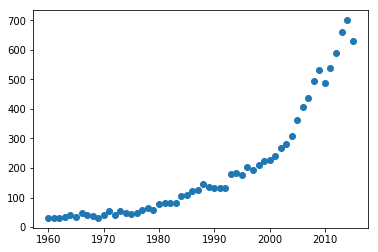

In [103]:
#visualize the result
plt.scatter(movie_released.index , movie_released)
plt.show()

The figure tell us that from beging of years 2000 that up to 200 movies , and from 2010 it increadbl increase until it over 700 movis

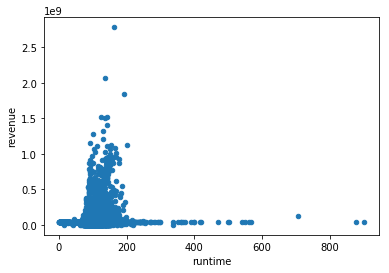

count    10865.000000
mean       102.362816
std         30.904045
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [104]:
df.plot(x="runtime", y="revenue", kind="scatter")
plt.show()
df['runtime'].describe()

max runtime value is too longt 900 min and 25% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes, 75% have runtime over 111 minutes

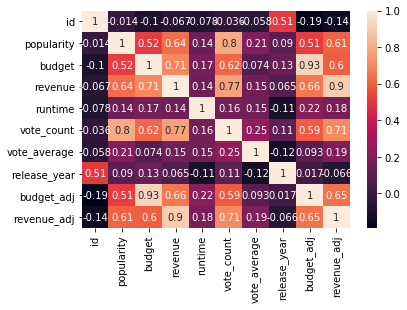

In [105]:
sns.heatmap(df.corr() , annot =True)

From heat_map There is a strong correlation betweeen vote_count and revenue and budget and revenue
Then not very strong correlation between (popularity and reveue )

In [106]:
budgets = df.groupby('release_year').mean()['budget']
revenues = df.groupby('release_year').mean()['revenue']

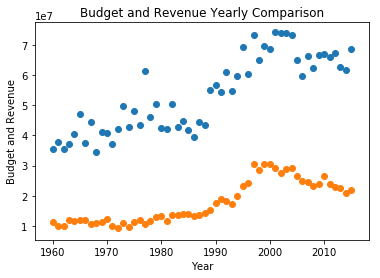

In [107]:
#visulaizing by scatter plot between revenue and budgets
plt.scatter(revenues.index , revenues)
plt.scatter(budgets.index , budgets)
plt.title('Budget and Revenue Yearly Comparison')
plt.xlabel('Year')
plt.ylabel('Budget and Revenue')
plt.show()

Budgets has effect on revenue over years  because form figuer its positve relationship

<a id='conclusions'></a>
# Conclusions
● The most popular genres is Drama ( 4760 ) then the second is Comedy (3793 )

● from beging of years 2000 that up to 200 movies released and from 2010 it increadble increase until it over 700 movis

● max runtime value is too longt 900 min and 25% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes, 75% have runtime over 111 minutes

● There is a strong correlation betweeen vote_count and revenue and budget and revenue  



### limitations
● The budget and revenue currency is unk nown


●  Cant know the way of caculate vote_average 

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0